**Contexto** Una empresa de alquiler de DVD quiere averiguar durante cuántos días alquilará un cliente un DVD basándose en algunas características. 
La empresa quiere un modelo que produzca un MSE de 3 o menos en un conjunto de prueba. 
Se espera que su modelo ayude a la empresa a ser más eficiente en la planificación de inventarios.

Los datos que han proporcionado están en el archivo csv `rental_info.csv`. 

Tiene las siguientes características:

- `"rental_date"`: The date (and time) the customer rents the DVD.
- `"return_date"`: The date (and time) the customer returns the DVD.
- `"amount"`: The amount paid by the customer for renting the DVD.
- `"amount_2"`: The square of `"amount"`.
- `"rental_rate"`: The rate at which the DVD is rented for.
- `"rental_rate_2"`: The square of `"rental_rate"`.
- `"release_year"`: The year the movie being rented was released.
- `"length"`: Lenght of the movie being rented, in minuites.
- `"length_2"`: The square of `"length"`.
- `"replacement_cost"`: The amount it will cost the company to replace the DVD.
- `"special_features"`: Any special features, for example trailers/deleted scenes that the DVD also has.
- `"NC-17"`, `"PG"`, `"PG-13"`, `"R"`: These columns are dummy variables of the rating of the movie. It takes the value 1 if the move is rated as the column name and 0 otherwise. For your convinience, the reference dummy has already been dropped.

**Guía**:

1. Obtener el número de días de alquiler.

2. Categorización (dummy) y normalización de variables.

3. División entrenamiento-prueba.

4. Selección de características(?)

5. Elección de modelos y ajuste de hiperparámetros

6. Predicción de valores en el conjunto de pruebas

7. Cálculo del error cuadrático medio

In [ ]:
#simon londono Rojas

In [44]:
#predecir dias de alquiler
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.pipeline import Pipeline

import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('rental_info.csv')
df

,rental_date,return_date,amount,release_year,rental_rate,length,replacement_cost,special_features,NC-17,PG,PG-13,R,amount_2,length_2,rental_rate_2
0,2005-05-25 02:54:33+00:00,2005-05-28 23:40:33+00:00,2.99,2005.0,2.99,126.0,16.99,"{Trailers,""Behind the Scenes""}",0,0,0,1,8.9401,15876.0,8.9401
1,2005-06-15 23:19:16+00:00,2005-06-18 19:24:16+00:00,2.99,2005.0,2.99,126.0,16.99,"{Trailers,""Behind the Scenes""}",0,0,0,1,8.9401,15876.0,8.9401
2,2005-07-10 04:27:45+00:00,2005-07-17 10:11:45+00:00,2.99,2005.0,2.99,126.0,16.99,"{Trailers,""Behind the Scenes""}",0,0,0,1,8.9401,15876.0,8.9401
3,2005-07-31 12:06:41+00:00,2005-08-02 14:30:41+00:00,2.99,2005.0,2.99,126.0,16.99,"{Trailers,""Behind the Scenes""}",0,0,0,1,8.9401,15876.0,8.9401
4,2005-08-19 12:30:04+00:00,2005-08-23 13:35:04+00:00,2.99,2005.0,2.99,126.0,16.99,"{Trailers,""Behind the Scenes""}",0,0,0,1,8.9401,15876.0,8.9401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15856,2005-08-22 10:49:15+00:00,2005-08-29 09:52:15+00:00,6.99,2009.0,4.99,88.0,11.99,"{Trailers,""Deleted Scenes"",""Behind the Scenes""}",0,0,0,1,48.8601,7744.0,24.9001
15857,2005-07-31 09:48:49+00:00,2005-08-04 10:53:49+00:00,4.99,2009.0,4.99,88.0,11.99,"{Trailers,""Deleted Scenes"",""Behind the Scenes""}",0,0,0,1,24.9001,7744.0,24.9001
15858,2005-08-20 10:35:30+00:00,2005-08-29 13:03:30+00:00,8.99,2009.0,4.99,88.0,11.99,"{Trailers,""Deleted Scenes"",""Behind the Scenes""}",0,0,0,1,80.8201,7744.0,24.9001
15859,2005-07-31 13:10:20+00:00,2005-08-08 14:07:20+00:00,7.99,2009.0,4.99,88.0,11.99,"{Trailers,""Deleted Scenes"",""Behind the Scenes""}",0,0,0,1,63.8401,7744.0,24.9001


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15861 entries, 0 to 15860
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   rental_date       15861 non-null  datetime64[ns]
 1   return_date       15861 non-null  datetime64[ns]
 2   amount            15861 non-null  float64       
 3   release_year      15861 non-null  int32         
 4   rental_rate       15861 non-null  float64       
 5   length            15861 non-null  float64       
 6   replacement_cost  15861 non-null  float64       
 7   special_features  15861 non-null  object        
 8   NC-17             15861 non-null  int64         
 9   PG                15861 non-null  int64         
 10  PG-13             15861 non-null  int64         
 11  R                 15861 non-null  int64         
 12  amount_2          15861 non-null  float64       
 13  length_2          15861 non-null  float64       
 14  rental_rate_2     1586

In [49]:
df['rental_date'] = pd.to_datetime(df['rental_date']) 
df['return_date'] = pd.to_datetime(df['return_date'])

df['dias_alquiler'] = (df['return_date'] - df['rental_date']).dt.days
df['release_year'] = df['release_year'].astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15861 entries, 0 to 15860
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   rental_date       15861 non-null  datetime64[ns]
 1   return_date       15861 non-null  datetime64[ns]
 2   amount            15861 non-null  float64       
 3   release_year      15861 non-null  int32         
 4   rental_rate       15861 non-null  float64       
 5   length            15861 non-null  float64       
 6   replacement_cost  15861 non-null  float64       
 7   special_features  15861 non-null  object        
 8   NC-17             15861 non-null  int64         
 9   PG                15861 non-null  int64         
 10  PG-13             15861 non-null  int64         
 11  R                 15861 non-null  int64         
 12  amount_2          15861 non-null  float64       
 13  length_2          15861 non-null  float64       
 14  rental_rate_2     1586

In [60]:
df_copy = df.copy()

In [61]:
df_copy = df_copy.drop(columns=['rental_date', 'return_date','special_features'])

In [62]:
cat_col = df_copy.select_dtypes(include = ['object']).columns.to_list()
num_col = df_copy.select_dtypes(include = ['int32','int64', 'float64']).columns.to_list()
cat_transformer = Pipeline(steps = [('encoder', OneHotEncoder())])
num_transformer = Pipeline(steps = [('scaler', MinMaxScaler())])
preprocessor = ColumnTransformer(transformers = [('numeric', num_transformer, num_col), ('categorical', cat_transformer, cat_col)],
                                 remainder = 'passthrough')
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('numeric',
                                 Pipeline(steps=[('scaler', MinMaxScaler())]),
                                 ['amount', 'release_year', 'rental_rate',
                                  'length', 'replacement_cost', 'NC-17', 'PG',
                                  'PG-13', 'R', 'amount_2', 'length_2',
                                  'rental_rate_2', 'dias_alquiler']),
                                ('categorical',
                                 Pipeline(steps=[('encoder', OneHotEncoder())]),
                                 [])])

In [65]:
data_pre = preprocessor.fit_transform(df_copy)
#cod_cat = preprocessor.named_transformers_['categorical']['encoder'].get_feature_names_out(cat_col)
labels = np.concatenate([num_col])
data_pro = pd.DataFrame(data_pre, columns = labels)
data_pro

,amount,release_year,rental_rate,length,replacement_cost,NC-17,PG,PG-13,R,amount_2,length_2,rental_rate_2,dias_alquiler
0,0.181818,0.166667,0.5,0.575540,0.35,0.0,0.0,0.0,1.0,0.055750,0.428540,0.332776,0.3
1,0.181818,0.166667,0.5,0.575540,0.35,0.0,0.0,0.0,1.0,0.055750,0.428540,0.332776,0.3
2,0.181818,0.166667,0.5,0.575540,0.35,0.0,0.0,0.0,1.0,0.055750,0.428540,0.332776,0.7
3,0.181818,0.166667,0.5,0.575540,0.35,0.0,0.0,0.0,1.0,0.055750,0.428540,0.332776,0.2
4,0.181818,0.166667,0.5,0.575540,0.35,0.0,0.0,0.0,1.0,0.055750,0.428540,0.332776,0.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15856,0.545455,0.833333,1.0,0.302158,0.10,0.0,0.0,0.0,1.0,0.335341,0.175278,1.000000,0.7
15857,0.363636,0.833333,1.0,0.302158,0.10,0.0,0.0,0.0,1.0,0.167530,0.175278,1.000000,0.4
15858,0.727273,0.833333,1.0,0.302158,0.10,0.0,0.0,0.0,1.0,0.559182,0.175278,1.000000,0.9
15859,0.636364,0.833333,1.0,0.302158,0.10,0.0,0.0,0.0,1.0,0.440258,0.175278,1.000000,0.8


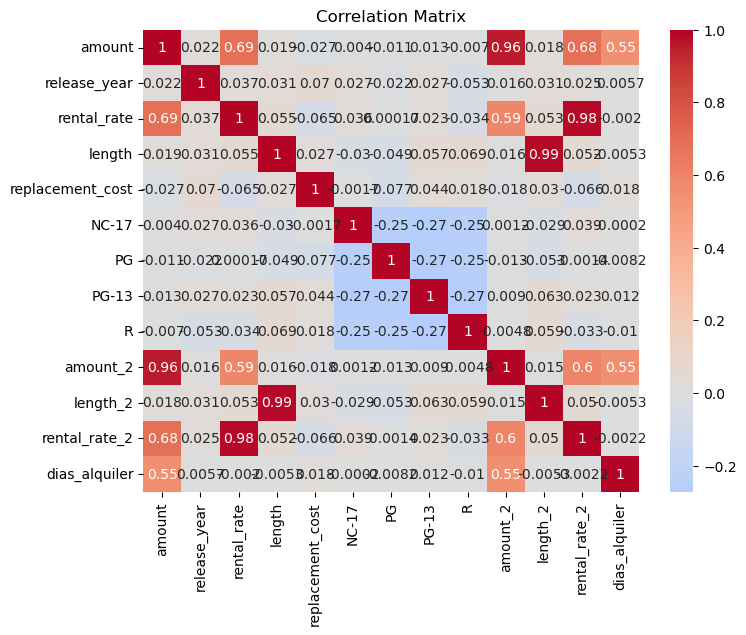

In [ ]:
corr_matrix = data_pro.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()